<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/notebooks/simple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1. 設定 Google Drive 連接 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') # 點擊網址，選擇 Google 帳號登入，然後將授權碼貼回輸入框中

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ln -fs /content/gdrive/My\ Drive/Colab\ Notebooks/Datascience /app

In [ ]:
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/Datascience
!pwd
import os
print(os.listdir())

/content/gdrive/My Drive/Colab Notebooks/Datascience
/content/gdrive/My Drive/Colab Notebooks/Datascience
['features_ex1.ipynb', 'input', 'Comprehensive data exploration with Python.ipynb', 'power.ipynb', 'Normalize.ipynb', 'power_norm.ipynb', 'pdplot.ipynb', 'power_temp_102-108.ipynb', 'HW01.ipynb', 'scikit-learn_learning_curve.ipynb', 'plot_ols.ipynb', 'plot_train_error_vs_test_error.ipynb', 'PythonDataScienceHandbook-master', 'cuDNN', 'paper-powerSale-Temp-SVM.ipynb', '預測自行車流量.ipynb', 'ResNet on CIFAR10.ipynb', 'saved_models', 'onehotencoding_sequence.ipynb', 'stock', '處理景氣資料.ipynb', 'imdb_try.ipynb', 'Paper_Linear_regression-powersale_temperature.ipynb', '5.4.3_feature1.ipynb', '5.7 Support Vector Machines.ipynb', 'Treat_comma_in_number.ipynb', 'power', 'yolo_darknet_face-recognition.ipynb', 'power2006-2015_poly.ipynb', 'Time Serial data', 'long-short-term-memory-networks-with-python.pdf', 'shampoo sales.ipynb', 'date_index_formatter.ipynb', 'power2006-2015.ipynb', 'opsd-power-temp

### 步驟 2. 下載 cuDNN 檔案

1. 申請 Nvidia 帳號，申請網址為 http://bit.ly/2qfpOPj
2. 下載 `cudnn-10.0-linux-x64-v7.5.0.56.tgz`，下載網址為 
下載 cuDNN 檔案。下載網址為：http://bit.ly/2qfpOPj
3. 將下載的檔案 `cudnn-10.0-linux-x64-v7.5.0.56.tgz` 放到 google drive 的 `Colab Notebooks/cuDNN/` 目錄下。

In [ ]:
!tar -xzvf /app/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# 檢查是否安裝成功
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [1]:
#簡單回歸 Y=aX+b
# DataSet: https://drive.google.com/file/d/1qifytItlATLvyRuoRvm1wXL-qxNvEH6t/view?usp=sharing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
plt.style.use('ggplot')
plt.rcParams['font.family']='SimHei' #⿊體

df1=pd.read_csv("2012MLB.csv",encoding="big5")
df1.head()
df1.describe() 

#切分訓練 測試資料
x=df1[['R']]
y=df1[['HR']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20170816) #30%測試資料 70%訓練資料 設定種子值
x_test
y_test

,HR
19,103
15,169
18,130
22,162
28,178
2,158
10,225
25,130
0,188


In [3]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(21, 1)
(21, 1)
(9, 1)
(9, 1)


In [4]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
print (linreg.intercept_)
print (linreg.coef_)

[-40.07282192]
[[0.28895404]]


In [6]:
df1.head

<bound method NDFrame.head of     Unnamed: 0                   Team    G    R  ...   SB    SO    AVG    OBP
0            1          Texas Rangers  152  764  ...   89  1030  0.275  0.335
1            2     Los Angeles Angels  153  726  ...  125  1041  0.273  0.331
2            3       Colorado Rockies  152  718  ...   96  1129  0.272  0.329
3            4    St. Louis Cardinals  153  723  ...   89  1128  0.272  0.338
4            5   San Francisco Giants  153  683  ...  111  1032  0.270  0.327
5            6         Detroit Tigers  152  689  ...   53  1042  0.268  0.336
6            7     Kansas City Royals  152  644  ...  126   958  0.267  0.319
7            8         Boston Red Sox  154  716  ...   92  1129  0.264  0.319
8            9        Minnesota Twins  153  673  ...  129  1004  0.262  0.326
9           10   Washington Nationals  152  680  ...   95  1236  0.261  0.322
10          11       New York Yankees  152  736  ...   90  1115  0.261  0.333
11          12      Milwaukee Brew

In [7]:
df1.describe()

,Unnamed: 0,G,R,H,H1B,H2B,H3B,HR,RBI,BB,SB,SO,AVG,OBP
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,152.533333,662.000000,1322.566667,878.366667,260.700000,29.366667,154.133333,630.233333,462.300000,102.133333,1140.733333,0.254800,0.319200
std,8.803408,0.628810,53.943777,75.842252,60.523283,24.203377,9.404633,30.428813,54.808559,41.139921,24.658682,91.315268,0.012113,0.010845
min,1.000000,151.000000,551.000000,1206.000000,767.000000,218.000000,12.000000,95.000000,514.000000,380.000000,51.000000,958.000000,0.233000,0.294000
25%,8.250000,152.000000,620.500000,1262.250000,828.000000,249.250000,23.250000,130.000000,591.000000,433.000000,89.250000,1055.000000,0.245500,0.312500
50%,15.500000,153.000000,668.000000,1318.000000,859.000000,257.500000,29.000000,153.500000,633.000000,454.500000,99.000000,1157.000000,0.254000,0.319000
75%,22.750000,153.000000,699.750000,1378.500000,919.000000,280.000000,35.750000,178.750000,676.750000,499.750000,120.000000,1189.000000,0.263500,0.327000
max,30.000000,154.000000,764.000000,1447.000000,997.000000,330.000000,54.000000,225.000000,738.000000,539.000000,150.000000,1296.000000,0.275000,0.338000


findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


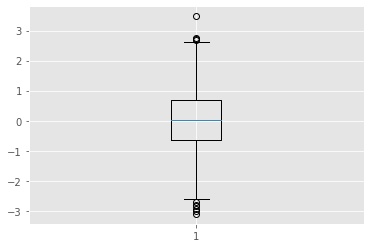

異常値:  [-3.10301753 -2.69824481 -2.83458391 -2.93322323 -2.82256551 -3.02035613
  3.47469858  2.76656543  2.68779088  2.71061212]


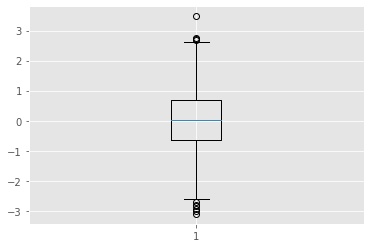

In [8]:
%matplotlib inline
#異常値偵測  盒鬚圖


y=np.random.randn(1000)  #隨機產生値


plt.boxplot(y,showfliers=True)
plt.show()


r=plt.boxplot(y,showfliers=True)

print('異常値: ',r['fliers'][0].get_data()[1])#取得異常値

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


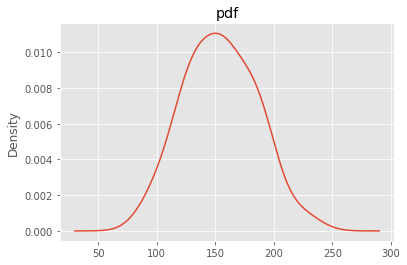

標準差 : 30.428812722125077


In [9]:
#常態分佈與標準差
df2=df1['HR']


df2.plot(kind='kde',title='pdf')
plt.show()

print('標準差 :',df2.std())

findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25955 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22294 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans.


corr:             H        HR
H   1.000000  0.144424
HR  0.144424  1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25955 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22294 missing from current font.
  font.set_text(s, 0, flags=flags)


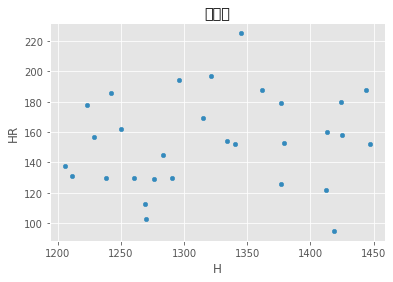

In [10]:
#相關性分析
#相關程度不等於有因果關係
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family']='Microsoft JhengHei' #⿊體

print('corr: ',df1[['H','HR']].corr())


df1.plot(x='H',y='HR',kind='scatter',title='散布圖')
plt.show()
 

